# PDS2: Final exam

### Date: June 18

### Time: 10:00 - 13:00


**Instructions:** 
* All answers should be filled in the notebook and then submitted to Moodle;
* For theoretical question you can use markdown and LaTeX;
* Save number of cells used for compilation;
* In order to get max scores, please write explanations and comments for each step. In addition, try to comment your code pieces.
* **Plagiarism will result in FAIL. For example, two students having identical code for solution, then both will get 0 mark for the exam.**


GOOD LUCK!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Scaling
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Models Needed
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import Ridge, Lasso , RidgeCV, LassoCV
from sklearn.decomposition import PCA

# ML- model Evaluation
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score ,roc_curve,auc
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings  # do not show matching warnings
warnings.filterwarnings('ignore')

## Task 1 - Classification (25%)

Steps to do:

0. Read data from task_1_dataset.xlsx.
1. Find highly correlated features and remove one of them.
2. Split data into train and test (test size is 0.3).
3. Apply some feature selection technique.
4. Fit train dataset with several models of your choice (at least 3 different algorithms).
5. Think which models and what hyperparemeters should be tuned. Tune appropriate model with GridSearchCV or RandomSearchCV. Tune at least 2 hyperparameters.
6. Find AUC for train and test sets for all three models. Save results in data frame format. Show results.
7. Write some conclusion about model performances

In [ ]:
# reading the excel file
df1 = pd.read_excel('task_1_dataset.xlsx')
df1.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var22,var23,var24,var25,var26,var27,var28,var29,var30,target
0,-2.177011,-6.226248,-4.180724,-0.301575,0.312956,2.072484,-0.431621,11.231389,2.647677,-1.255365,...,-2.177011,7.461246,2.547404,-4.967362,1.907483,1.692546,-3.468058,-8.705446,-1.128374,0
1,-2.091911,-6.166519,2.630665,-2.710098,-6.709456,-9.957898,1.572536,-3.160593,0.800949,-1.731416,...,-2.091911,-1.825861,-1.357695,3.462102,-0.292048,-1.820714,-4.606010,8.642310,-1.561423,1
2,2.371305,17.347923,-1.361822,0.129764,0.006112,3.565529,-0.048206,1.842185,-2.963972,0.629045,...,2.371305,-4.719132,-1.798156,-0.254512,-7.593664,0.170942,-1.080999,1.496065,2.593735,0
3,0.190427,-3.864422,-1.502271,0.523183,-1.767517,-2.963652,1.307273,3.199642,0.182576,-1.424840,...,0.190427,1.670265,0.115206,-1.048627,-4.164541,-0.088675,-3.645926,-2.236702,1.605658,0
4,-1.137822,6.357994,1.355599,6.443955,0.199483,-1.264720,0.093690,-2.481635,-0.559349,4.330649,...,-1.137822,-0.805009,-0.307193,1.307138,-1.717511,-2.829551,3.006860,2.654826,1.541139,0


In [ ]:
df1.shape

(10000, 31)

In [ ]:
# convert series to dataframe so it can be sorted
correlation = df1.corr()['target']
correlation_df = pd.DataFrame(correlation)
# correct column label from Balance to correlation
correlation_df.columns = ["Correlation"]
# sort correlation
corr_sorted = correlation_df.sort_values(by=['Correlation'], ascending=False)
corr_sorted

,Correlation
target,1.000000
var15,0.178073
var30,0.177587
var6,0.176325
var26,0.174867
var3,0.174021
var16,0.172952
var14,0.171773
var18,0.166787
var28,0.163760


In [ ]:
df1 = df1.drop("var15", axis = 1) 
df1 = df1.drop("var22", axis = 1) 

In [ ]:
# X and y arrays:
X = df1.drop("target", axis = 1) # All columns except this column.
y = df1["target"] # Only this column

# splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021) 
# 70% training and 30% test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 28)
(7000,)
(3000, 28)
(3000,)


In [ ]:
#  feature selection
fs = SelectKBest(score_func=f_classif, k=5)
# apply feature selection
X_selected = fs.fit_transform(X, y)
print(X_selected.shape)

(10000, 5)


In [ ]:
# Collecting into 1 df all f_scores:
df_cols = pd.DataFrame(X.columns)
df_score = pd.DataFrame(fs.scores_)
all_fscorr = pd.concat([df_cols,df_score],axis=1)
all_fscorr.columns = ['Names','F_score']
all_fscorr.nlargest(16,'F_score')

,Names,F_score
15,var17,1062.187276
27,var30,325.575862
5,var6,320.816390
23,var26,315.367389
2,var3,312.227497
14,var16,308.285634
13,var14,303.968486
16,var18,286.082996
12,var13,282.883578
24,var27,280.792141


In [ ]:
chosen_cols = all_fscorr[all_fscorr.F_score>240]['Names'].to_list()
chosen_cols

['var1',
 'var2',
 'var3',
 'var6',
 'var10',
 'var12',
 'var13',
 'var14',
 'var16',
 'var17',
 'var18',
 'var26',
 'var27',
 'var28',
 'var30']

In [ ]:
X = df1[['var1','var2','var3','var6','var10','var12','var13','var14','var16','var17','var18','var26','var27','var28','var30']]
y = df1['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021) 

In [ ]:
from sklearn.naive_bayes import GaussianNB
NaiveBayse_model = GaussianNB()
# Fit the model using train sets
NaiveBayse_model.fit(X_train, y_train)

NB_probs_train = NaiveBayse_model.predict_proba(X_train)
NB_probs_train = NB_probs_train[:, 1]
NB_probs_test = NaiveBayse_model.predict_proba(X_test)
NB_probs_test = NB_probs_test[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, NB_probs_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, NB_probs_test)

auc_NaiveBayse_test = round(auc(fpr_test, tpr_test),3)
print('AUC on test set',auc_NaiveBayse_test)

auc_NaiveBayse_train = round(auc(fpr_train, tpr_train),3)
print('AUC on train set',auc_NaiveBayse_train)

AUC on test set 0.839
AUC on train set 0.849


In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train,y_train)

Log_probs_train = log_model.predict_proba(X_train)
Log_probs_train = Log_probs_train[:, 1]
Log_probs_test = log_model.predict_proba(X_test)
Log_probs_test = Log_probs_test[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, Log_probs_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, Log_probs_test)

log_auc_ts = round(auc(fpr_test, tpr_test),3)
print('AUC on test set',log_auc_ts)

log_auc_tr = round(auc(fpr_train, tpr_train),3)
print('AUC on train set',log_auc_tr)

AUC on test set 0.852
AUC on train set 0.864


In [ ]:
from sklearn.tree import DecisionTreeClassifier

DTree_model = DecisionTreeClassifier()

DTree_model.fit(X_train,y_train)

# probability
probs_train = DTree_model.predict_proba(X_train)
probs_train = probs_train[:, 1]
probs_test = DTree_model.predict_proba(X_test)
probs_test = probs_test[:, 1]

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, probs_train)
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, probs_test)

Dectr_auc_ts = round(auc(fpr_test, tpr_test),3)
print('AUC on test set',Dectr_auc_ts)

Dectr_auc_tr = round(auc(fpr_train, tpr_train),3)
print('AUC on train set',Dectr_auc_tr)

AUC on test set 0.78
AUC on train set 1.0


In [ ]:
# collecting into 1 Dataframe

all_Auc_tr = [auc_NaiveBayse_train, log_auc_tr, Dectr_auc_tr ]
all_Auc_ts = [auc_NaiveBayse_test, log_auc_ts, Dectr_auc_ts ]

#columns:
columns={'AUC_score_TRAIN':all_Auc_tr,'AUC_score-TEST':all_Auc_ts}

models=['NaiveBayes ', ' Logistic', 'Decision Tree']
result = pd.DataFrame(data = columns,index = models)
result

,AUC_score_TRAIN,AUC_score-TEST
NaiveBayes,0.849,0.839
Logistic,0.864,0.852
Decision Tree,1.000,0.780


## We can see that Desiion tree showed good results on Train=100 and not for test-78%.
+ NaiveBayes.On test score were higher than others.
+ I need a  littlit bit time for GridCV for my model.

## Task 2 - Clustering (25%)

Steps to do:

0. Read data from task_2_dataset.xlsx.
1. Fit KMEans 8 times with values of K from 1 to 8.
2. Save square root of _inertia__ attribute into list and plot those values with corresponding K's.
3. Using 'elbow' rule, find out how many clusters we have in our dataset.
4. Create KMeans with selected values of K from the previous step.
5. Save labels for each observation into _labels_ array.
6. Apply PCA to reduce dimension of your data, use n_components as 2.
7. Plot scatterplot of 2 components with different colors from _labels_ array.
8. Comment your findings.

In [ ]:
# reading the excel file
df2 = pd.read_excel('task_2_dataset.xlsx')
df2.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10
0,-0.501163,-7.255475,-5.572167,-1.805756,-1.591788,7.309525,-6.865964,0.689374,1.059544,-9.284560
1,2.129898,-6.030686,-4.523330,-3.016737,-1.476348,4.291699,-6.780570,0.334200,2.054573,-9.941892
2,-2.173184,9.295427,5.713340,0.841088,-6.221385,-6.348730,-8.966260,7.628342,2.948812,4.946535
3,-9.149524,9.426631,6.372079,-5.774996,-5.671090,-6.380030,-4.059996,0.283833,-2.255232,-3.239336
4,3.177287,-5.794053,-3.438450,-0.885736,-0.407087,4.826428,-7.255387,-0.543231,1.440112,-9.680664


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
inertia = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(df2)
    inertia.append(np.sqrt(kmeans.inertia_))

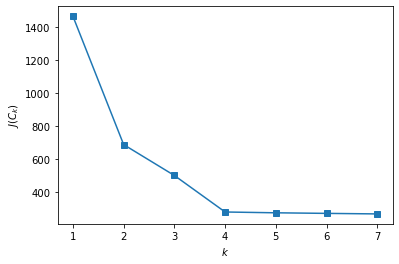

In [ ]:
plt.plot(range(1, 8), inertia, marker="s")
plt.xlabel("$k$")
plt.ylabel("$J(C_k)$");

### 3. We see that  𝐽(𝐶𝑘)  decreases significantly until the number of clusters is 4 and then does not change as much anymore. This means that the optimal number of clusters is 4.

In [ ]:
# Create KMeans with selected values of K from the previous step.

kmeans = KMeans(n_clusters=4, random_state=2021)
kmeans.fit(df2)

KMeans(n_clusters=4, random_state=2021)

In [ ]:
# Save labels for each observation into labels array.
klabels = []
klabels.append(kmeans.labels_)
klabels

[array([1, 1, 0, ..., 1, 2, 2])]

In [ ]:
# Apply PCA to reduce dimension of your data, use n_components as 2.

pca = PCA(n_components=2)
pc_labels = pca.fit_transform(df2)
# pc_labels.reshape(1,-1)
pc_labels

array([[ 16.68229476,  -2.78985108],
       [ 15.33504184,  -2.634441  ],
       [ -7.73258591,  12.81723594],
       ...,
       [ 16.68105337,  -3.22729345],
       [ -9.46395413,  -3.72459506],
       [-10.88203157,  -3.08514505]])

In [ ]:
# Plot scatterplot of 2 components with different colors from labels array.

# df2.plot.scatter(x=pc_labels[:,0],y=pc_labels[:,1],color='r')

#plt.scatter(klabels, pc_labels)
# plt.show()

# Comment your findings.
+ Little troubles with scatter plot()
+ 
+
+
+

## Task 3 - Regression (25%)

Steps to do:

0. Read data from task_3_dataset.xlsx.
1. Check basic info about dataset.
2. Perform some EDA with visualisation.
3. Split data into train and test (test size 0.3).
4. Fit a linear regression model.
5. Find $R^2$ on train and test datasets. Save results into dataframe.
6. Plot scatterplot of actual target vs. predicted on test dataset.
7. Fit any regularized linear regression model.
8. Using CV find optimal alpha.
9. For model with optimal alpha find $R^2$ on train and test datasets. Save results into dataframe.
10. Compare performance of the models. Write some conclusions.

In [ ]:
# reading the excel file
df3 = pd.read_excel('task_3_dataset.xlsx')
df3.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var42,var43,var44,var45,var46,var47,var48,var49,var50,target
0,-0.552089,-1.145582,-0.931693,0.714074,1.535745,0.267954,0.541724,1.532839,0.731628,-0.455638,...,-0.681037,0.391393,-0.143473,-0.383202,0.699552,-0.590929,-0.698003,0.269960,1.695117,84.079638
1,-0.045569,-0.649839,0.112068,-0.311601,1.080510,0.994413,-0.210373,-1.681002,1.154218,1.136129,...,1.442451,0.250696,0.552947,-1.188570,-0.777756,-0.565737,1.722244,-0.461826,0.587752,30.657333
2,-0.986841,0.231556,-0.657143,-1.008164,-0.471398,-1.404933,-0.509124,0.925725,0.049995,1.393613,...,0.932760,-1.479063,0.678840,-1.538005,-0.267960,0.648383,1.317819,0.606854,-0.061530,-334.801479
3,-1.336637,-1.189614,0.763404,-0.963962,1.130956,-0.932618,2.108902,0.215339,0.296754,-1.063522,...,0.791164,-0.510876,-0.054669,1.499147,0.734234,1.570248,1.914833,-0.974446,-1.786229,-284.953354
4,-0.523307,-1.293480,-0.084331,0.596403,-1.643833,-0.796517,1.719972,-0.548076,0.531256,-0.482633,...,-1.591038,0.577650,0.058708,0.507060,0.280299,1.427768,-0.343348,-0.724645,1.119481,89.542225


In [ ]:
df3.shape

(10000, 51)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    10000 non-null  float64
 1   var2    10000 non-null  float64
 2   var3    10000 non-null  float64
 3   var4    10000 non-null  float64
 4   var5    10000 non-null  float64
 5   var6    10000 non-null  float64
 6   var7    10000 non-null  float64
 7   var8    10000 non-null  float64
 8   var9    10000 non-null  float64
 9   var10   10000 non-null  float64
 10  var11   10000 non-null  float64
 11  var12   10000 non-null  float64
 12  var13   10000 non-null  float64
 13  var14   10000 non-null  float64
 14  var15   10000 non-null  float64
 15  var16   10000 non-null  float64
 16  var17   10000 non-null  float64
 17  var18   10000 non-null  float64
 18  var19   10000 non-null  float64
 19  var20   10000 non-null  float64
 20  var21   10000 non-null  float64
 21  var22   10000 non-null  float64
 22 

In [ ]:
df3.describe()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var42,var43,var44,var45,var46,var47,var48,var49,var50,target
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.004011,-0.001200,-0.002679,-0.012580,0.014144,0.000326,-0.020309,0.001541,0.000659,0.008903,...,0.001879,-0.018041,-0.001796,-0.013135,0.005035,0.020945,-0.012692,0.003702,0.008312,-0.611116
std,1.004097,1.000336,0.990558,0.995950,0.996275,0.985418,1.006413,1.015812,0.998513,0.989999,...,0.993579,1.010828,1.016529,1.003854,1.002887,0.997885,0.994347,0.988654,1.001970,268.270480
min,-3.578297,-4.026679,-3.430437,-3.975072,-3.692551,-4.500813,-3.682940,-3.904860,-3.704877,-3.518435,...,-3.829719,-3.952121,-4.143642,-3.760710,-3.874490,-4.495762,-5.103320,-3.847644,-4.073785,-913.142267
25%,-0.660830,-0.676835,-0.666858,-0.686459,-0.670067,-0.649232,-0.692736,-0.689795,-0.669276,-0.658779,...,-0.677228,-0.685432,-0.685251,-0.679675,-0.683241,-0.661028,-0.687426,-0.654810,-0.667382,-179.924619
50%,0.014161,0.003254,0.005065,-0.004457,0.014334,-0.001578,-0.017748,0.002245,0.011996,0.000424,...,0.017460,-0.009779,-0.003993,-0.009065,0.010001,0.030801,-0.012339,-0.006079,0.012634,-2.862369
75%,0.670767,0.674785,0.670572,0.658110,0.688902,0.653439,0.653044,0.685312,0.673148,0.661298,...,0.674650,0.653006,0.675370,0.642489,0.677199,0.707252,0.669283,0.686885,0.681461,179.792238
max,3.980403,3.546467,4.030870,3.807020,3.450334,3.814196,4.482454,4.238484,3.645326,3.983850,...,3.995849,3.877645,4.030577,3.619090,3.653071,4.318137,3.443685,3.897299,3.891586,1271.612272


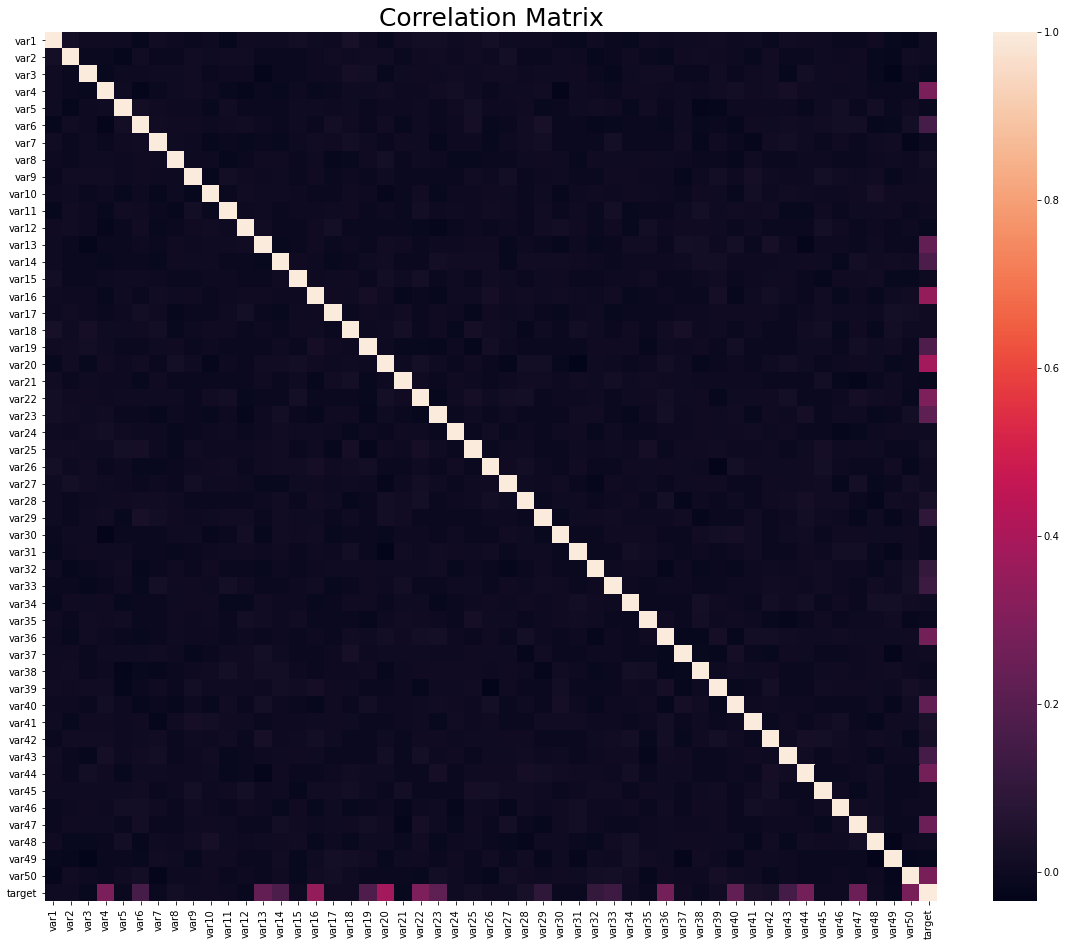

In [ ]:
# PLOTTIG GRAPHS
f, (ax) = plt.subplots(1, 1, figsize=(20,16))
sub_sample_corr = df3.corr()
sns.heatmap(sub_sample_corr, annot_kws={'size':16}, ax=ax)
ax.set_title('Correlation Matrix', fontsize=25)
plt.show()

<AxesSubplot:xlabel='target', ylabel='var16'>

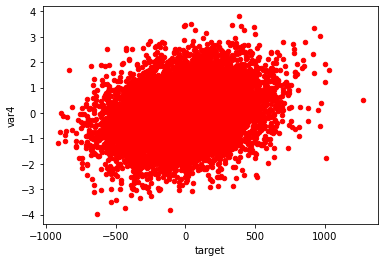

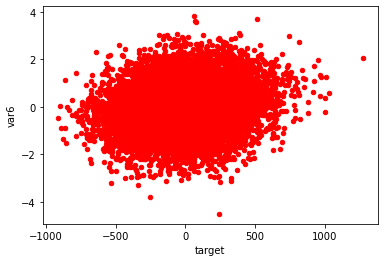

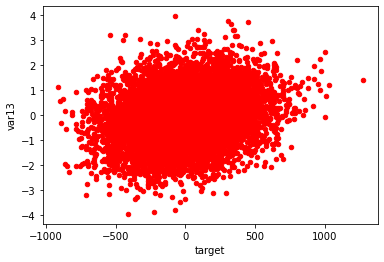

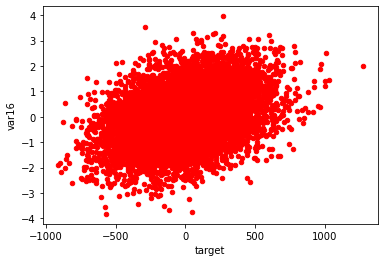

In [ ]:
# PLOTTING SCATTER PLOTS TO SEE RANGES
df3.plot.scatter(x='target',y="var4",color='r')
df3.plot.scatter(x='target',y="var6",color='r')
df3.plot.scatter(x='target',y="var13",color='r')
df3.plot.scatter(x='target',y="var16",color='r')

In [ ]:
# X and y arrays:
X = df3.drop("target", axis = 1) # All columns except this column.
y = df3["target"] # Only this column

# splitting data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2021) 
# 70% training and 30% test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7000, 50)
(7000,)
(3000, 50)
(3000,)


In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Evaluating on Train set
lin_r2_tr = round(r2_score(y_train,lin_reg.predict(X_train)),3)
print('R2_score on Train set>',lin_r2_tr)

# Evaluating on Test set
lin_r2_ts = round(r2_score(y_test,lin_reg.predict(X_test)),3)
print('R2_score on Test set> ',lin_r2_ts)

R2_score on Train set> 1.0
R2_score on Test set>  1.0


In [ ]:
# collecting into 1 Dataframe
all_train_r2 = [lin_r2_tr]
all_test_r2 = [lin_r2_ts]
#columns:
columns={'Train_R2':all_train_r2,'Test_R2':all_test_r2}
models=['Linear Regresion']
result = pd.DataFrame(data = columns,index = models)
result

,Train_R2,Test_R2
Linear Regresion,1.0,1.0


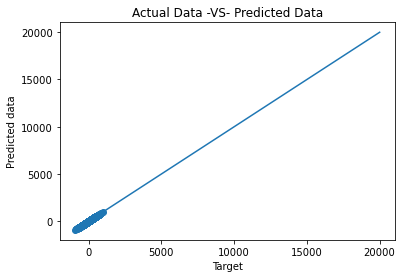

In [ ]:
y_predict= lin_reg.predict(X_test)

plt.scatter(y_test, y_predict)
plt.plot(range(20000), range(20000))

plt.xlabel("Target")
plt.ylabel("Predicted data")
plt.title("Actual Data -VS- Predicted Data")
plt.show()

In [ ]:
from numpy import absolute
# creating Ridge and applying CV on it:
for cur_alpha in [0,1e-8, 1e-4, 1e-2, 1.0, 5.0, 10, 100, 1000]:
    lr_object =  Ridge(alpha=cur_alpha)
    scores = cross_val_score(lr_object, X_train, y_train, scoring='neg_mean_squared_error')
    print("Alpha: {0}\t  MSE_score: {1}\t  ".format(cur_alpha, absolute(np.mean(scores))))

Alpha: 0	  MSE_score: 7.283697448233043e-26	  
Alpha: 1e-08	  MSE_score: 2.273965146971361e-19	  
Alpha: 0.0001	  MSE_score: 2.2736487184292052e-11	  
Alpha: 0.01	  MSE_score: 2.2736405821342752e-07	  
Alpha: 1.0	  MSE_score: 0.0022728311844003044	  
Alpha: 5.0	  MSE_score: 0.05673913341071157	  
Alpha: 10	  MSE_score: 0.2265493022680683	  
Alpha: 100	  MSE_score: 21.940455999786415	  
Alpha: 1000	  MSE_score: 1634.5535600204646	  


In [ ]:
# WHEN ALPHA IS 1.0- MSE IS LOW:
# Let's also check very lARGE VALUE IS -> Infinity is approx= 10^308.9
ridge = Ridge(alpha=1.0,normalize = True)
ridge.fit(X_train, y_train)

ridge_r2_tr = round(r2_score(y_train, ridge.predict(X_train)),3)
print('R^2 on Train set>',ridge_r2_tr)
# Evaluating on TEST set:
ridge_r2_ts = round(r2_score(y_test, ridge.predict(X_test)),3)
print('R^2 on test set>',ridge_r2_ts)

R^2 on Train set> 0.756
R^2 on test set> 0.754


In [ ]:
# collecting into 1 Dataframe
all_train_r2 = [ridge_r2_tr]
all_test_r2 = [ridge_r2_ts]
#columns:
columns={'Train_R2':all_train_r2,'Test_R2':all_test_r2}
models=['Ridge Regresion with CV on it ']
result2 = pd.DataFrame(data = columns,index = models)
result2

,Train_R2,Test_R2
Ridge Regresion with CV on it,0.756,0.754


### Compare performance of the models. Write some conclusions.

+ Firstly, I created a Linear Regression mODEL, as usual, and find out R2 score on both train and test.
+ And resilts were equal, to 1.0, it means that **100 %** fitted model.
+ But I suppose, it is a little bit strange.Maybe overfitting data. As we have seen before, from Scatter plot, to actual and predicted data.
+ After that I created Ridge Regression, and with th help of loop, I checked Small MSE through different alphas.
+ A nd find out that when alpha is 0.1, MSE is very small.
+ That's why I choose it, and scores for R2-score were releatively good, for **75 %** fitted model, and I suppose, that It looks more realistic prediction.

## Task 4 - Theory (25%)
On your own words answer any **THREE** questions from below:
1. What metrics you would use in case of imbalanced dataset in classification problem? Explain each metrics and why you would use it. (8%).
2. Explain Bias-Variance Tradeoff principle. (8%)
3. Describe how regularized linear regression models work. (8%)
4. Explain advantage of using Random Forest model over Decision Tree model. (8%)
5. What is the difference between KNN and K-means models? Explain each model briefly. (8%)

+ Thank you for choice.
+ 1.
+ In capstone project, we have dealt with inbalanced data, and as I remember we used for classification task, metrics such as **classification matrix**, to understand whether a positive or negative prediction, and from formulas we know that it helped to find : **Precision,Recall,F1_score**.
    + So, Recall shows us how well the positive class was predicted, while precision shows as positive a sample that is negative. Together combining them, we can see the balance between them by **F1**. In all cases, it if range close ot 0 is worst, if to 1. it is best case was.

+ 3.
+ Here, when we use regularised models, they are more flexible, so it avoids the risk of overfitting.
+ Moreover, we use λ - tuning parameter, which shows how much we want to penalize the flexibility of our model.
+ From lectures, I remember that when we use regularization, it significantly reduces  variance of  model, without substantial increase in its bias. Also, all coefficients estimates are closer to zero.
+ To summarise, I want to say that it is  useful technique, that can help in improving the accuracy of our models.

+ 4
+ Firstly, 2 models are connected, because RandomForest is collection of Decision trees.
+ It means that,it contains many decision trees, when model created it randomly selects features to input data, and then makes a tree with each node and best splits at each step like a tree.
+ Which helps to predict strong and high results of the model.
+ Also, when we used RandomForest and Decision in 3 hw, then RandomForest Regressor model showed better results than others.
+ Because, it minimizes overfitting risk by analysing a random sub-samples of dataset and it tends to be more accurate.

---

### Evaluatian form (Keep it)

| Question | Mark  | Comnent   
|:-------:|:--------:|:----------------------
| 1       |   20/25    | Tuning is not performed. Corr is not properly done.
| 2       |   19/25    | No scatterplot. No comments and conclusion.
| 3       |   21/25    | Scaling is not applied.
| 4       |   25/25    | 
|**Total**|**85/100**  | 
